# Creando una base de datos con Python

In [1]:
import sqlite3
import pandas as pd

Antes de iniciar se debe dar un previo contexto de lo que se tiene:

1. Se ha creado la base de datos db_ventas.db 
2. La base de datos db_ventas se creo con la ayuda del diagrama anexado (ojo por cuestiones de prácticas de tomo el diagrama anexado (Foto siguiente)
3. Se crearon 2 tablas por medio de **DB Browser (SQLite)** siendo las tablas **'CLIENTES'** Y **'FACTURAS'** 

Nota: el código para crear las 2 tablas se anexa en **.sql**

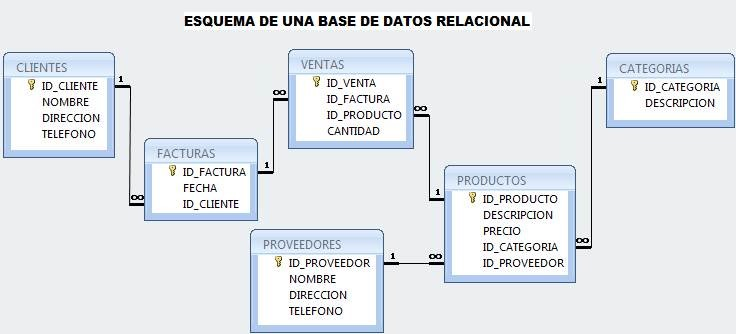


El siguiente código muestra las tablas existentes en la base de datos

In [2]:
path_db = r"C:\Users\Alejandro Zavala\Zavala_Programas\Repositorios_Git\Analisis_De_Datos\SQLite\Database\DataBase_Ventas.db"
con = sqlite3.connect(path_db)
cur = con.cursor()

for renglon in cur.execute('''SELECT name
                              FROM sqlite_master 
                              WHERE type = "table"'''):
    print(renglon)
    
#Cerramos la conexion
con.close()

('CLIENTES',)
('FACTURAS',)


In [3]:
# Similar a Describe

con = sqlite3.connect(path_db)

df_describe = pd.read_sql_query("""PRAGMA table_info(CLIENTES);""", con)

display(df_describe)

con.close()

,cid,name,type,notnull,dflt_value,pk
0,0,ID_CLIENTE,TEXT,1,None,1
1,1,NOMBRE,TEXT,1,None,0
2,2,DIRECCION,TEXT,0,None,0
3,3,TELEFONO,INTEGER,0,None,0


Definimos una funcion que nos ayude a establecer una conexion a la base de datos

In [4]:
def sql_conexion(path):
    try:
        conexion_path = sqlite3.connect(path)
        cursor_obj = conexion_path.cursor()
        return conexion_path,cursor_obj
    except Exception as e:
        print(e)

In [5]:
con,cur = sql_conexion(path_db)

## Creando tabla CATEGORIAS

In [6]:
con.execute("""CREATE TABLE CATEGORIAS(
               "ID_CATEGORIA" TEXT NOT NULL UNIQUE,
               "DESCRIPCION" TEXT NOT NULL UNIQUE,
               PRIMARY KEY("ID_CATEGORIA"));""")
con.commit()

In [7]:
df_tables = pd.read_sql_query('''SELECT name
                              FROM sqlite_master 
                              WHERE type = "table"''', con)

display(df_tables)

,name
0,CLIENTES
1,FACTURAS
2,CATEGORIAS


## Creando tabla PROVEEDORES

In [8]:
con.execute("""CREATE TABLE PROVEEDORES(
               "ID_PROVEEDOR" TEXT NOT NULL UNIQUE,
               "NOMBRE" TEXT NOT NULL,
               "DIRECCION" TEXT,
               "TELEFONO" NUMERIC,
               PRIMARY KEY("ID_PROVEEDOR"));""")
con.commit()

In [9]:
df_tables = pd.read_sql_query('''SELECT name
                              FROM sqlite_master 
                              WHERE type = "table"''', con)

display(df_tables)

,name
0,CLIENTES
1,FACTURAS
2,CATEGORIAS
3,PROVEEDORES


## Creando tabla PRODUCTOS

In [10]:
con.execute("""CREATE TABLE PRODUCTOS(
               "ID_PRODUCTO" TEXT NOT NULL UNIQUE,
               "DESCRIPCION" TEXT,
               "PRECIO" REAL NOT NULL,
               "ID_CATEGORIA" TEXT NOT NULL UNIQUE,
               "ID_PROVEEDOR" TEXT NOT NULL UNIQUE,
               PRIMARY KEY("ID_PRODUCTO"),
               FOREIGN KEY("ID_CATEGORIA") REFERENCES "CATEGORIAS"("ID_CATEGORIA")
               FOREIGN KEY("ID_PROVEEDOR") REFERENCES "PROVEEDORES"("ID_PROVEEDOR")
               );""")
con.commit()

In [11]:
df_tables = pd.read_sql_query('''SELECT name
                              FROM sqlite_master 
                              WHERE type = "table"''', con)

display(df_tables)

,name
0,CLIENTES
1,FACTURAS
2,CATEGORIAS
3,PROVEEDORES
4,PRODUCTOS


## Creando tabla VENTAS

In [12]:
con.execute("""CREATE TABLE VENTAS(
               "ID_VENTA" TEXT NOT NULL UNIQUE,
               "ID_FACTURA" TEXT NOT NULL UNIQUE,
               "ID_PRODUCTO" REAL NOT NULL UNIQUE,
               "CANTIDAD" INT NOT NULL UNIQUE,
               PRIMARY KEY("ID_VENTA"),
               FOREIGN KEY("ID_FACTURA") REFERENCES "FACTURAS"("ID_FACTURA")
               FOREIGN KEY("ID_PRODUCTO") REFERENCES "PRODUCTOS"("ID_PRODUCTO")
               );""")
con.commit()

In [13]:
df_tables = pd.read_sql_query('''SELECT name
                              FROM sqlite_master 
                              WHERE type = "table"''', con)

display(df_tables)

,name
0,CLIENTES
1,FACTURAS
2,CATEGORIAS
3,PROVEEDORES
4,PRODUCTOS
5,VENTAS


In [14]:
con.close()